In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
#for ipynb
%matplotlib inline
import yaml

In [2]:
#get list of files with data
in_dirs = ['../results']

samples_yaml = '../config/samples.GC.yaml'
tfx_path = '../../../../griffin_paper/data/delfi_metadata/analysis/Delfi_tumor_fraction_data.txt'
metadata_path = '/fh/fast/ha_g/user/adoebley/projects/griffin_paper/data/delfi_metadata/analysis/matched_metadata_corrected.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = []
for in_dir in in_dirs:
    for sample in samples:
        in_files.append(in_dir+'/'+sample+'/'+sample+'.GC_corrected.coverage.tsv')
print(len(in_files))    

423


In [3]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [4]:
#import data
start_time = time.time()
data = pd.DataFrame()
for i,file in enumerate(in_files):
    if not os.path.exists(file):
        print('missing',file)
        continue
    if i%50==0:
        print(i,'importing',file,np.round(time.time()-start_time))
    current = pd.read_csv(file,sep='\t')
    data = data.append(current, ignore_index=True)
        

0 importing ../results/Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.GC_corrected.coverage.tsv 0.0
50 importing ../results/Breast_Cancer_CGPLBR49/Breast_Cancer_CGPLBR49.GC_corrected.coverage.tsv 4.0
100 importing ../results/Colorectal_Cancer_CGCRC321/Colorectal_Cancer_CGCRC321.GC_corrected.coverage.tsv 8.0
150 importing ../results/Healthy_CGPLH210/Healthy_CGPLH210.GC_corrected.coverage.tsv 12.0
200 importing ../results/Healthy_CGPLH365/Healthy_CGPLH365.GC_corrected.coverage.tsv 17.0
250 importing ../results/Healthy_CGPLH425/Healthy_CGPLH425.GC_corrected.coverage.tsv 21.0
300 importing ../results/Healthy_CGPLH479/Healthy_CGPLH479.GC_corrected.coverage.tsv 27.0
350 importing ../results/Lung_Cancer_CGPLLU161/Lung_Cancer_CGPLLU161.GC_corrected.coverage.tsv 32.0
400 importing ../results/Pancreatic_Cancer_CGPLPA37/Pancreatic_Cancer_CGPLPA37.GC_corrected.coverage.tsv 37.0


In [5]:
data.set_index('sample')

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,mean_coverage,central_coverage,amplitude,outlier_cutoff,exclude_zero_mappability,correction,number_of_sites,site_name,smoothing,CNA_normalization
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.95895,0.95760,0.94766,0.94094,0.94195,0.94385,0.94732,0.95396,0.95864,0.96244,...,0.93298,0.92904,0.41248,6.0,True,GC_corrected,30000,AHR.hg38.30000,True,True
Bile_Duct_Cancer_CGPLPA114,0.98792,0.98459,0.98207,0.98289,0.98161,0.98228,0.98465,0.98605,0.98862,0.98880,...,0.99984,1.07929,0.23812,6.0,True,GC_corrected,30000,AR.hg38.30000,True,True
Bile_Duct_Cancer_CGPLPA114,0.95299,0.95512,0.95565,0.95193,0.94865,0.94638,0.94801,0.94616,0.94563,0.95126,...,0.93920,0.97309,0.22923,6.0,True,GC_corrected,30000,ARNT.hg38.30000,True,True
Bile_Duct_Cancer_CGPLPA114,0.96433,0.96352,0.96255,0.96038,0.96183,0.96130,0.95917,0.96356,0.95905,0.96185,...,0.96626,1.05668,0.47893,6.0,True,GC_corrected,30000,ARNTL.hg38.30000,True,True
Bile_Duct_Cancer_CGPLPA114,0.97606,0.97833,0.98004,0.98577,0.98242,0.98262,0.98428,0.97799,0.97535,0.96928,...,0.97826,1.00084,0.25670,7.0,True,GC_corrected,30000,ASCL1.hg38.30000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA95,0.95919,0.95702,0.95110,0.94321,0.93208,0.93355,0.92986,0.93343,0.93740,0.94306,...,0.93177,0.95953,0.48123,6.0,True,GC_corrected,30000,ZNF467.hg38.30000,True,True
Pancreatic_Cancer_CGPLPA95,0.95382,0.94810,0.94267,0.94145,0.94364,0.94187,0.94631,0.95033,0.95796,0.96020,...,0.95676,1.00239,0.42697,6.0,True,GC_corrected,30000,ZNF554.hg38.30000,True,True
Pancreatic_Cancer_CGPLPA95,0.91883,0.89470,0.87548,0.86201,0.86845,0.87796,0.89585,0.91508,0.93737,0.94566,...,0.87785,0.79058,2.98453,5.0,True,GC_corrected,30000,ZNF580.hg38.30000,True,True


In [6]:
#get the metadata
#get the metadata
metadata1 = pd.read_csv(metadata_path, sep='\t')
metadata1 = metadata1[['new_sample_name','Stage']].set_index('new_sample_name') 
metadata2 = pd.read_csv(tfx_path, sep='\t')
metadata2 = metadata2[['sample','tfx','sample_type']].set_index('sample') 
metadata = metadata1.merge(metadata2, left_index = True, right_index=True)
metadata = metadata.reset_index()
metadata = metadata.rename(columns = {'tfx':'tumor_fraction','index':'sample'})
metadata['status'] = np.where(metadata['sample_type'].str.contains('ancer'),1,0)
metadata['Stage'] = metadata['Stage'].str.strip(' ')
# metadata['Stage'] = np.where(metadata['Stage'].isnull(),'Healthy',metadata['Stage'])

metadata_columns = ['sample','tumor_fraction','status','sample_type','Stage']
metadata = metadata[metadata_columns]
print("metadata:",len(metadata))


#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data))

metadata: 536
114210
114210


In [7]:
print(len(data['site_name'].unique()))
print(len(data['sample'].unique()))
print(len(data))
print(len(data['site_name'].unique())*len(data['sample'].unique()))


270
423
114210
114210


In [8]:
data['number_of_sites'].unique()

array([30000])

In [9]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [10]:
#get the key columns
data = data[metadata_columns+['site_name','correction',
                              'central_coverage','amplitude','mean_coverage']+str_plot_columns]
print(len(data))

# site_groups = ['0_5_FC']

site_groups = data['site_name'].str.rsplit('.',1,expand=True)[1].unique()
print(site_groups)
site_names = data['site_name'].unique()

for item in site_groups:
    current_sites = [m for m in site_names if m.endswith(item)]
    current = data[data['site_name'].isin(current_sites)]
    print(item,len(current_sites))

    current.to_csv('merged_data/'+item+'_data_with_features.txt', sep='\t', index=False)
    print(current['Stage'].unique())

114210
['30000']
30000 270
['II' 'IV' 'I' 'III' 'X' '0' nan]


In [11]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [12]:
#reformat for logistic regression
reformatted = data[metadata_columns+['site_name','central_coverage','amplitude','mean_coverage']]
reformatted = reformatted.set_index(metadata_columns+['site_name']).unstack()

new_column_names = []
for item in reformatted.columns.values:
    new_column_names.append('_'.join(item))
    
reformatted.columns = new_column_names

# reformatted.to_csv('reformatted_data_with_features.txt',sep='\t')

In [13]:
for item in site_groups:
    current_sites = [m for m in site_names if m.endswith(item)]
    current_features = []

    for sites in current_sites:
        current_features.append('central_coverage_'+sites)
        current_features.append('mean_coverage_'+sites)
        current_features.append('amplitude_'+sites)

    current = reformatted[current_features]
    print(current.shape)
    current.to_csv('merged_data/'+item+'_reformatted.txt', sep='\t')


(423, 810)


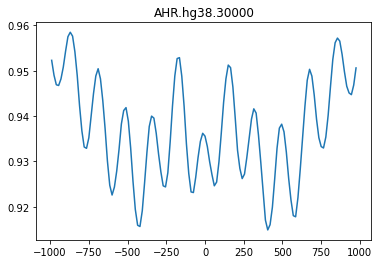

In [14]:
#plot
for site_name in data['site_name'].unique():
    current = data[data['site_name']==site_name][str_plot_columns].mean()
    plt.plot(plot_columns,current, label=site_name)
    plt.title(site_name)
    break
# plt.legend()



fft real -0.23904449067618147
fft imag -0.07370623820185943
fft magn 0.250149711318051
sum x coords -0.23904449067619404
sum y coords -0.07370623820188099
magnitude: 0.25014971131806935


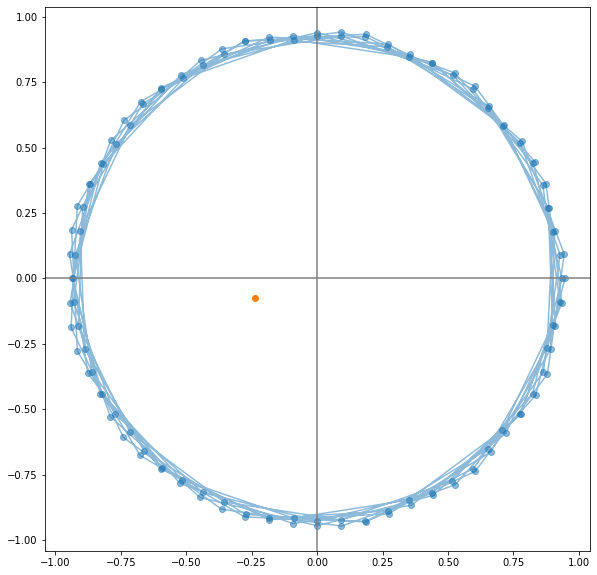

In [15]:
fft_columns = np.arange(-960,960,15)
str_fft_columns = [str(m) for m in fft_columns]

#plot out what the fft is doing for a given frequency
demo_res = np.fft.fft(current[str_fft_columns])
demo_signal = current[str_fft_columns]

frequency = 10
print('fft real', demo_res[frequency].real)
print('fft imag', demo_res[frequency].imag)
print('fft magn',np.abs(demo_res[frequency]))

#get angles for rotation
angles = np.linspace(0,2*np.pi,len(demo_signal)+1)
angles = -angles[0:-1]

#wrapped at frequency
heights = np.sin(angles*frequency)*demo_signal
widths = np.cos(angles*frequency)*demo_signal
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(widths,heights, alpha = 0.5)
ax.scatter(widths,heights, alpha = 0.5)
ax.set_aspect('equal')
ax.scatter(sum(widths),sum(heights))
ax.axvline(0, color = 'grey')
ax.axhline(0, color = 'grey')
print('sum x coords',sum(widths))
print('sum y coords',sum(heights))
print('magnitude:',np.sqrt(sum(widths)**2+sum(heights)**2))

In [16]:
# from scipy.signal import find_peaks
# plt.plot(fft_columns,current)
# peaks =  [fft_columns[m] for m in find_peaks(current)[0]]
# plt.scatter(peaks,[.99 for m in peaks])
# print(peaks)

# spacing = []
# for i in range(len(peaks)-1):
#     spacing.append(peaks[i+1]-peaks[i])
# np.mean(spacing)